<img style="float: right;" width="120" src="http://neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<img style="float: left; margin-top: 0" width="80" src="http://neueda.conygre.com/pydata/images/client-logo.png">
<br><br><br>


# Part 1

## Calculate the Bollinger Band for

> the month moving average of its Adjusted Closing price for AAPL

### 1.1) Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.2) Load the data into a DataFrame

Here I am using `pandas.read_csv(...)` to read in a csv file into a pandas DataFrame


`filepath_or_buffer`
> the file being read in
    
`index_col`
> the column of the csv file we want to use as 
> the index of our DataFrame

`parse_dates`
> instruct the read_csv function to convert anything 
> that looks like a date into a python date

In [2]:
df = pd.read_csv(filepath_or_buffer='http://neueda.conygre.com/pydata/AAPL.csv', 
                 index_col='Date', 
                 parse_dates=True)

### 1.3)  Check what has been imported into the DataFrame
- Have a quick look at what we have read in
- No right or wrong way to do this
- Depends on your style, personal preferences, type of data being read in etc
- A few examples
> `df.tail()`
`df.head()`
`df.describe()`
    
**IMPORTANT**<br>
>When working with DataFrames that have Dates as an index, make sure the date values are sorted in an ascending manner

In [3]:
df.head()

Open    High     Low   Close     Volume  Ex-Dividend  \
Date                                                                 
2000-01-03  104.87  112.50  101.69  111.94  4783900.0          0.0   
2000-01-04  108.25  110.62  101.19  102.50  4574800.0          0.0   
2000-01-05  103.75  110.56  103.00  104.00  6949300.0          0.0   
2000-01-06  106.12  107.00   95.00   95.00  6856900.0          0.0   
2000-01-07   96.50  101.00   95.50   99.50  4113700.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2000-01-03          1.0   3.369314   3.614454  3.267146    3.596463   
2000-01-04          1.0   3.477908   3.554053  3.251081    3.293170   
2000-01-05          1.0   3.333330   3.552125  3.309234    3.341362   
2000-01-06          1.0   3.409475   3.437748  3.052206    3.052206   
2000-01-07          1.0   3.100399   3.244977  3.068270    3.196784   

            Adj. Volume  
Date                     
2000-01-03  133949200.0  
2000-01-04  128094400.0  
2000-01-05  194580400.0  
2000-01-06  191993200.0  
2000-01-07  115183600.0

### 1.4) Calculate the Bollinger Bands for the Adj. Close

- **Middle Band** = Monthly moving average <br>
- **Upper Band** = Monthly moving average + (Monthly standard deviation of price x 2) 
- **Lower Band** = Monthly moving average - (Monthly standard deviation of price x 2)

In [4]:
# 21 days is a good approximation of a single month
df['30d mavg'] = df['Adj. Close'].rolling(window=21).mean()
df['30d std'] = df['Adj. Close'].rolling(window=21).std()
df['Upper Band'] = df['30d mavg'] + (df['30d std'] * 2)
df['Lower Band'] = df['30d mavg'] - (df['30d std'] * 2)

### 1.5) Plot the results

Use the matplot lib defaults

A plot of the entire series of values

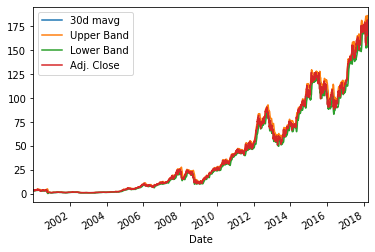

In [5]:
# create a list of the column names we are interested in plotting

cols = ['30d mavg','Upper Band','Lower Band', 'Adj. Close']
        
df[cols].plot()

### 1.6) Plot the results 

> of all data from the start of 2016 to the end of the series

Here use Slice from '2016 to the end

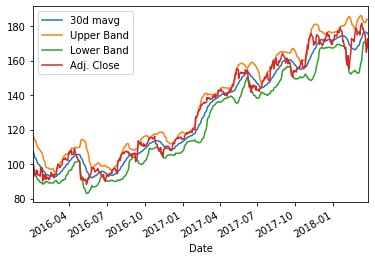

In [6]:
df['2016':][cols].plot()

# Part 2

## Improve the presentation of the chart

Here I am 
- 'shading' in the regions between the upper and lower bands
- adding a title, a legend and some labels

The important parts of the python code are

> **style** - fivethirtyeight <br>
**figsize** - dimensions of plot in inches. This is an approximation for computer screens but is more accurate for printing plots<br>
**fill_between** - shades in areas betrween 2 lines

No handles with labels found to put in legend.


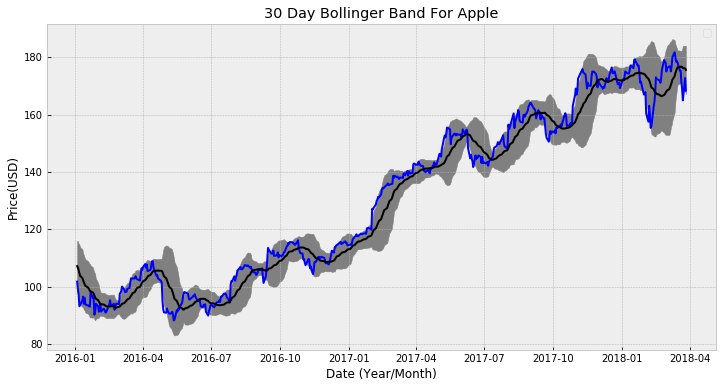

In [7]:
# set style, empty figure and axes
plt.style.use('bmh')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df['2016':].index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(x_axis, df['2016':]['Upper Band'], df['2016':]['Lower Band'], color='grey')

ax.plot(x_axis, df['2016':]['Adj. Close'], color='blue', lw=2)
ax.plot(x_axis, df['2016':]['30d mavg'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For Apple')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show();


# Part 3

### 3.1) Make your code more resuable by converting it to a function

Here I am 
- 'shading' in the regions between the upper and lower bands
- adding a title, a legend and some labels

The important parts of the python code are

> **style** - fivethirtyeight <br>
**figsize** - dimensions of plot in inches. This is an approximation for computer screens but is more accurate for printing plots<br>
**fill_between** - shades in areas betrween 2 lines

In [8]:
def plotBollBand(file, securityName, attribute = 'Adj. Close', window = 21, start=None, end=None):
    
    
    df = pd.read_csv(filepath_or_buffer=file, 
                 index_col='Date', 
                 parse_dates=True)

    mavgCol = str(window) + "d mavg"
    stdCol = str(window) + "d std"
    
    df[mavgCol] = df[attribute].rolling(window=window).mean()
    df[stdCol] = df[attribute].rolling(window=window).std()
    df['Upper Band'] = df[mavgCol] + (df[stdCol] * 2)
    df['Lower Band'] = df[mavgCol] - (df[stdCol] * 2)
       
    # set style, empty figure and axes
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)

    # Get index values for the X axis for the DataFrame
    x_axis = df[start:end].index.get_level_values(0)

    # Plot shaded 21 Day Bollinger Band for Facebook
    ax.fill_between(x_axis, df[start:end]['Upper Band'], df[start:end]['Lower Band'], color='grey')

    ax.plot(x_axis, df[start:end][attribute], color='blue', lw=2)
    ax.plot(x_axis, df[start:end][mavgCol], color='black', lw=2)

    # Set Title & Show the Image
    title = str(window) + ' Day Bollinger Band For ' + securityName
    ax.set_title(title)
    ax.set_xlabel('Date (Year/Month)')
    ax.set_ylabel('Price')
    ax.legend()
    plt.show();

### 3.2)  Test with Google

For example use the data for google but leave all other inputs as default

No handles with labels found to put in legend.


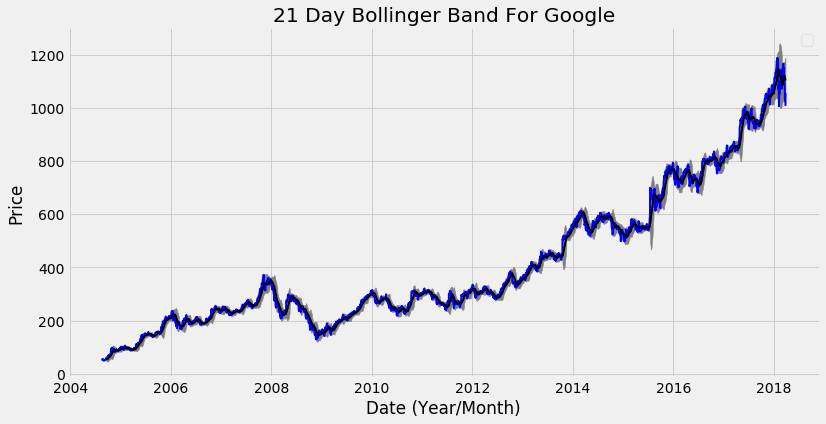

In [9]:
plotBollBand(file='http://neueda.conygre.com/pydata/GOOGL.csv', securityName='Google')

### 3.2)  Test with JPM

For example use the data for JPM but with the following parameters
- start 2014
- end - default
- a 42 day rolling average
- use the ADjusted Volumne colum

No handles with labels found to put in legend.


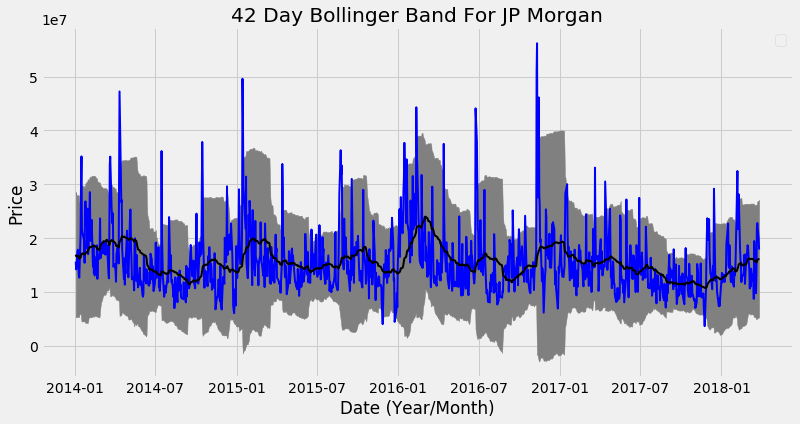

In [10]:
plotBollBand(file='http://neueda.conygre.com/pydata/JPM.csv', 
             securityName='JP Morgan', 
             start='2014', 
             window=42,
             attribute = 'Adj. Volume')

<div style="text-align: right">Developed for Citi by Neueda - 2019 </div>